# Kaggle Datasets Analysis

In [1]:
import pandas as pd  

# data from kaggle : https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news
df = pd.read_csv('./data/FinancialPhraseBank/all-data.csv', engine='python', encoding='ISO-8859-1')        # 'utf-8' codec error
df

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


In [2]:
df.iloc[3][1]

C:\Users\woojin\AppData\Local\Temp\ipykernel_27604\3292216812.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[3][1]


"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."

In [3]:
# prompt for the sentimental analysis
prompt = """You are an sentiment analyzer specialized in classifying sentiment of short financial texts.
Your task is to analyze the sentiment of the provided financial text and convert it into string format. Never include any other information or strings but output formt.

Follow these steps and respond only in the specified output format:

# Step 1: Read the provided financial text carefully.

# Step 2: Assign a sentiment score between 0 and 1 based on financial perspective.

# Step 3: Do a sentimental analysis and classify it into positive, negative or neutral category and get the reason why in the financial perspective.

# Step 4: Convert the classification into the specified output format.

#### output format:
<sentimental analysis>

### Example
# Text : The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported 
# Output : negative
# Text : Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .
# Output : neutral
# Text : 'With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .'
# Output : positive
# Text : Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres.
# Output : neutral
"""

In [4]:
## llm model

from langchain_community.chat_models import ChatOllama
from openai import OpenAI
import keyring
import pandas as pd
# sentimental analysis

def sentiment_analysis(prompt=prompt, content=None, model='llama'):
    # getting contents from the link
    query = prompt + "\n\n#### Text:\n\n" + content
    # getting model's response
    if model == 'llama':
        llm = ChatOllama(model='llama3.1')
        response = llm.invoke(query)
        return response.content
    else:
        llm = OpenAI(api_key=keyring.get_password('openai', 'key_for_windows'))
        response = llm.chat.completions.create(
            model=model,
            messages=[
                {'role':'system', 'content':'You are a helpful assistant.'},
                {'role':'user', 'content':query}
            ]
        )
        return response.choices[0].message.content

In [81]:
df.iloc[: , 0]

0        neutral
1       negative
2       positive
3       positive
4       positive
          ...   
4840    negative
4841     neutral
4842    negative
4843    negative
4844    negative
Name: neutral, Length: 4845, dtype: object

In [82]:
df.iloc[:, 1]

0       Technopolis plans to develop in stages an area...
1       The international electronic industry company ...
2       With the new production plant the company woul...
3       According to the company 's updated strategy f...
4       FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
                              ...                        
4840    LONDON MarketWatch -- Share prices ended lower...
4841    Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842    Operating profit fell to EUR 35.4 mn from EUR ...
4843    Net sales of the Paper segment decreased to EU...
4844    Sales in Finland decreased by 10.5 % in Januar...
Name: According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ., Length: 4845, dtype: object

In [7]:
# function for random n samples / split train and test dataset
def get_random_samples(samples=df, n_random=100, test_size=0.3):
    df_sampled = df.sample(n=100)
    df_sampled_train = df_sampled.sample(round(n_random * (1 - test_size)))
    df_sampled_test = df_sampled.drop(df_sampled_train.index)
    return df_sampled_train, df_sampled_test

In [9]:
# extract random 100 test case with 10 iterations
import random
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')       # warning message not showing

accuracy_list = []
for n in tqdm(range(3)):
    sample_data, _ = get_random_samples(samples=df, n_random=10, test_size=0)
    y_true_list = []
    y_pred_list = []
    accuracy = 0
    for i, d in enumerate(sample_data.iterrows()):
        y_true = sample_data.iloc[i][0]
        y_pred = sentiment_analysis(content=sample_data.iloc[i][1])
        y_true_list.append(y_true)
        y_pred_list.append(y_pred)
    accuracy = accuracy_score(y_true_list, y_pred_list)
    print(accuracy)
    accuracy_list.append(accuracy)
accuracy_list

  0%|          | 0/3 [00:00<?, ?it/s]

0.5
0.3
0.6


[0.5, 0.3, 0.6]

In [10]:
import numpy as np 
np.average(accuracy_list)

0.4666666666666666

In [6]:
# extract random 100 test case with 10 iterations
import random
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')       # warning message not showing

accuracy_list = []
for i in tqdm(range(3)):
    numbers = random.sample(range(1, len(df)), 20)
    y_true_list = []
    y_pred_list = []
    accuracy = 0
    for n in tqdm(numbers):
        y_true = df.iloc[n][0]
        y_pred = sentiment_analysis(content=df.iloc[n][1], model='gpt-3.5-turbo')
        y_true_list.append(y_true)
        y_pred_list.append(y_pred)
    accuracy = accuracy_score(y_true_list, y_pred_list)
    print(accuracy)
    accuracy_list.append(accuracy)

accuracy_list

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

0.2


  0%|          | 0/20 [00:00<?, ?it/s]

0.1


  0%|          | 0/20 [00:00<?, ?it/s]

0.25


[0.2, 0.1, 0.25]

In [143]:
# # total responses
# from tqdm.notebook import tqdm
# # llama3.1

# responses = []
# for i in tqdm(range(len(df))):
#     text = df.iloc[i][1]
#     response = sentiment_analysis(content=text)
#     responses.append(response)

In [45]:
# df_label = pd.DataFrame({
#     'y_true': df.iloc[:, 0].to_list(),
#     'y_pred': responses_new
# })
# df_label

,y_true,y_pred
0,neutral,neutral
1,negative,negative
2,positive,neutral
3,positive,neutral
4,positive,neutral
...,...,...
4840,negative,
4841,neutral,
4842,negative,neutral
4843,negative,neutral


In [51]:
# from sklearn.metrics import accuracy_score

# accuracy = accuracy_score(df_label['y_true'], df_label['y_pred'])
# accuracy

0.48338493292053664

In [146]:
# df_label[df_label['y_true'] != df_label['y_pred']]

## Getting New Data

In [147]:
# import libraries
from gdeltdoc import GdeltDoc, Filters
from newspaper import Article
from datetime import datetime

# getting keyword related links function
def get_news_links(keyword='apple', start_date='2020-01-01', end_date='today'):
    if end_date == 'today':
        end_date = datetime.now().strftime('%Y-%m-%d')
    f = Filters(
        keyword=keyword,
        start_date=start_date,
        end_date=end_date
    )
    
    gd = GdeltDoc()
    links = gd.article_search(f)
    return links


In [148]:
# getting texts from the link using newpaper
def get_article_from_link(url):
    article = Article(url)
    article.download()
    article.parse()
    return article

In [149]:
# exmaple
links = get_news_links(keyword='openai')
text = get_article_from_link(links['url'][2])
text

In [150]:
text.text

'OpenAI is also in talks with investors such as Microsoft, Apple, Nvidia, and the investment firm Thrive for a deal that would value it at $100 billion. And the company is considering changes to its corporate structure that would make it easier to attract investors.\n\nOver the past several months, OpenAI, the maker of the online chatbot ChatGPT, has hired a who’s who of tech executives, disinformation experts, and AI safety researchers. It has also added seven board members — including a four-star Army general who ran the National Security Agency — while revamping efforts to ensure that its AI technologies do not cause serious harm.\n\nSAN FRANCISCO — OpenAI, the often troubled standard-bearer of the tech industry’s push into artificial intelligence, is making substantial changes to its management team, and even how it is organized, as it courts investments from some of the wealthiest companies in the world.\n\nAdvertisement\n\nThe San Francisco startup, after years of public conflict

In [151]:
text.publish_date

datetime.datetime(2024, 9, 3, 0, 0)

## Sentimental Analysis

In [178]:
prompt = """You are an information extractor specialized in identifying corporations listed on NASDAQ or Dow Jones from news articles. 
Your tasl is to extract key information from the given text and convert it into JSON format. Never include any other information or string but output format.
Never summarize the provided article.

Follow these steps and respond only in the specified output format:

# Step 1: Read the provided article carefully.

# Step 2: Itendity the main corporation from the article.

# Step 3: Assign a sentiment score between 0 and 1 based on the article.

# Step 4: Do the sentimental analysis and classify it into positive, negative or neutral cateogy in the sentimental perspective.

# Step 5: Convert the information into exact JSON output format without additional information or string.

#### output format:
{'entity':<company_name>, 'ticker':<stock_ticker>, 'sentiment':<positive/negative>, 'score':<float>, 'datetime':<provider publishing date -> YYYY-MM-DD>}
"""

In [181]:
from langchain_community.chat_models import ChatOllama
from openai import OpenAI
import keyring
import pandas as pd
# sentimental analysis

def sentiment_analysis(prompt=prompt, link=None, model='llama'):
    # getting contents from the link
    article = get_article_from_link(link)
    article_text = article.text if article.text else "No article text available."
    article_date = article.publish_date.strftime('%Y-%m-%d') if article.publish_date else "Unkown publish date"
    query = f"{prompt}\n\n#### article:\n\n{article_text}\n\n#### publish date:\n\n{article_date}"
    # getting model's response
    if model == 'llama':
        llm = ChatOllama(model='llama3.1')
        response = llm.invoke(query)
        return response.content, article.text
    else:
        llm = OpenAI(api_key=keyring.get_password('openai', 'key_for_windows'))
        response = llm.chat.completions.create(
            model=model,
            messages=[
                {'role':'system', 'content':'You are a helpful assistant.'},
                {'role':'user', 'content':query}
            ]
        )
        return response.choices[0].message.content, article.text

In [182]:
answer, text = sentiment_analysis(link=links['url'][2])
answer

"{'entity': 'OpenAI', 'ticker': '', 'sentiment': 'negative', 'score': 0.5, 'datetime': '2024-09-03'}"

In [183]:
text

'OpenAI is also in talks with investors such as Microsoft, Apple, Nvidia, and the investment firm Thrive for a deal that would value it at $100 billion. And the company is considering changes to its corporate structure that would make it easier to attract investors.\n\nOver the past several months, OpenAI, the maker of the online chatbot ChatGPT, has hired a who’s who of tech executives, disinformation experts, and AI safety researchers. It has also added seven board members — including a four-star Army general who ran the National Security Agency — while revamping efforts to ensure that its AI technologies do not cause serious harm.\n\nSAN FRANCISCO — OpenAI, the often troubled standard-bearer of the tech industry’s push into artificial intelligence, is making substantial changes to its management team, and even how it is organized, as it courts investments from some of the wealthiest companies in the world.\n\nAdvertisement\n\nThe San Francisco startup, after years of public conflict

In [184]:
answer, _ = sentiment_analysis(link=links['url'][2], model='gpt-3.5-turbo')
answer

"{'entity':'OpenAI', 'ticker':'', 'sentiment':'negative', 'score':0.3, 'datetime':'2024-09-03'}"

In [185]:
answer, _ = sentiment_analysis(link=links['url'][2], model='gpt-4o')
answer

'```json\n{"entity":"Microsoft","ticker":"MSFT","sentiment":"neutral","score":0.5,"datetime":"2024-09-03"}\n```'

## All combined together

In [193]:
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
# function getting links dataframe return data dataframe
def get_combined_dataframe(df):
    links = []
    titles = []
    texts = []
    seen_dates = []
    entities = []
    tickers = []
    sentiments = []
    scores = []
    publish_dates = []
    for i in tqdm(range(len(df))):
        link = df['url'][i]
        links.append(link)
        title = df['title'][i]
        titles.append(title)
        seen_date = df['seendate'][i]
        seen_dates.append(seen_date)
        try:
            answer, text = sentiment_analysis(link=link)
            answer = eval(answer)
            entity = answer['entity']
            ticker = answer['ticker']
            sentiment = answer['sentiment']    
            score = answer['score']
            publish_date = answer['datetime']
            texts.append(text)
            entities.append(entity)
            tickers.append(ticker)
            sentiments.append(sentiment)
            scores.append(score)
            publish_dates.append(publish_date)
        except Exception as e:
            # print(e  )
            texts.append('')
            entities.append('')
            tickers.append('')
            sentiments.append('')
            scores.append(np.nan)
            publish_dates.append('')
            continue
    
    print(f'title: {len(titles)}, link: {len(links)}, seen_date: {len(seen_dates)}, text: {len(texts)}, entity: {len(entities)}, score: {len(scores)}, publsih_date: {len(publish_dates)}')    
    # combine all in the DataFrame
    articles = pd.DataFrame({
        'title': titles,
        'link': links,
        'seen_date': seen_dates,
        'texts': texts,
        'entity': entities,
        'ticker': tickers,
        'score': scores,
        'publish_date': publish_dates
    })
    
    return articles

In [259]:
links_apple = get_news_links(start_date='2024-08-01')
links_apple

,url,url_mobile,title,seendate,socialimage,domain,language,sourcecountry
0,https://bgr.com/tech/icloud-is-apples-most-pop...,,iCloud is Apple most popular service ; see how...,20240821T174500Z,,bgr.com,English,United States
1,https://www.howtogeek.com/how-to-watch-apple-t...,,How to Watch Apple TV+ on Android ( TV & Phone...,20240824T190000Z,https://static1.howtogeekimages.com/wordpress/...,howtogeek.com,English,United States
2,https://bangla.bdnews24.com/tech/industry/877d...,,"বদলে যাচ্ছে অ্যাপল আইডি , যা জানা দরকার",20240824T161500Z,https://cdn.bdnews24.com/bdnews24/media/bangla...,bangla.bdnews24.com,Bengali,Bangladesh
3,https://www.makeuseof.com/how-to-use-apple-pay/,,How to Use Apple Pay in Stores and Online,20240821T211500Z,,makeuseof.com,English,United States
4,https://finance.sina.com.cn/tech/roll/2024-08-...,,苹果应用商店负责人将辞职 ， 苹果持续受到全球监管压力,20240823T020000Z,https://n.sinaimg.cn/sinakd20240822s/0/w1920h1...,finance.sina.com.cn,Chinese,China
...,...,...,...,...,...,...,...,...
245,https://www.huxiu.com/article/3439709.html,https://m.huxiu.com/article/3439709.html,刚刚 ， iPhone微信版本正式更新了,20240906T130000Z,https://img.huxiucdn.com/article/cover/202409/...,huxiu.com,Chinese,China
246,https://www.tvguide.com/news/apple-tv-free-tri...,,How to Get an Apple TV+ Free Trial in 2024,20240814T061500Z,https://www.tvguide.com/a/img/resize/f216eb725...,tvguide.com,English,United States
247,https://wallstreetcn.com/articles/3722494,,赛道Hyper | 苹果二季报 ： 总体尚可但AI少论,20240802T160000Z,https://wpimg-wscn.awtmt.com/4e6db5a7-9096-406...,wallstreetcn.com,Chinese,China
248,https://finance.sina.com.cn/jjxw/2024-09-06/do...,,欧盟何以重手治理 苹果税 |苹果公司 _ 新浪财经 _ 新浪网,20240906T014500Z,https://n.sinaimg.cn/spider20240906/481/w768h5...,finance.sina.com.cn,Chinese,China


In [260]:
df_apple = get_combined_dataframe(links_apple)
df_apple

  0%|          | 0/250 [00:00<?, ?it/s]

title: 250, link: 250, seen_date: 250, text: 250, entity: 250, score: 250, publsih_date: 250


,title,link,seen_date,texts,entity,ticker,score,publish_date
0,iCloud is Apple most popular service ; see how...,https://bgr.com/tech/icloud-is-apples-most-pop...,20240821T174500Z,It’s been five years since Apple announced it ...,Apple,AAPL,0.8,2024-08-21
1,How to Watch Apple TV+ on Android ( TV & Phone...,https://www.howtogeek.com/how-to-watch-apple-t...,20240824T190000Z,,,,NaN,
2,"বদলে যাচ্ছে অ্যাপল আইডি , যা জানা দরকার",https://bangla.bdnews24.com/tech/industry/877d...,20240824T161500Z,,,,0,
3,How to Use Apple Pay in Stores and Online,https://www.makeuseof.com/how-to-use-apple-pay/,20240821T211500Z,,,,NaN,
4,苹果应用商店负责人将辞职 ， 苹果持续受到全球监管压力,https://finance.sina.com.cn/tech/roll/2024-08-...,20240823T020000Z,,,,0.0,2024-08-23
...,...,...,...,...,...,...,...,...
245,刚刚 ， iPhone微信版本正式更新了,https://www.huxiu.com/article/3439709.html,20240906T130000Z,,,,NaN,
246,How to Get an Apple TV+ Free Trial in 2024,https://www.tvguide.com/news/apple-tv-free-tri...,20240814T061500Z,,,,NaN,
247,赛道Hyper | 苹果二季报 ： 总体尚可但AI少论,https://wallstreetcn.com/articles/3722494,20240802T160000Z,大中华区营收承压，苹果税再立新功。\n\n作者：周源/华尔街见闻\n\n苹果在中国市场的好日...,苹果,,0.5,
248,欧盟何以重手治理 苹果税 |苹果公司 _ 新浪财经 _ 新浪网,https://finance.sina.com.cn/jjxw/2024-09-06/do...,20240906T014500Z,,,,NaN,


In [196]:
links_microsoft = get_news_links(keyword='microsoft', start_date='2024-08-01')
df_micosoft = get_combined_dataframe(links_microsoft)

  0%|          | 0/250 [00:00<?, ?it/s]

title: 250, link: 250, seen_date: 250, text: 250, entity: 250, score: 250, publsih_date: 250


In [197]:
links_tesla = get_news_links(keyword='tesla', start_date='2024-08-01')
df_tesla = get_combined_dataframe(links_tesla)

  0%|          | 0/250 [00:00<?, ?it/s]

title: 250, link: 250, seen_date: 250, text: 250, entity: 250, score: 250, publsih_date: 250


## Apple

In [333]:
# apple
df_apple_processed = df_apple.dropna()

# dropout rows with no score
df_apple_processed = df_apple_processed[df_apple_processed['score'] != '']

# convert 'seen_date' from str to date
df_apple_processed['date'] = pd.to_datetime(df_apple_processed['seen_date'], format='%Y%m%dT%H%M%SZ')
df_apple_processed['date'] = df_apple_processed['date'].dt.tz_localize(None)
df_apple_processed.set_index('date', inplace=True)
df_apple_processed.sort_index(inplace=True)

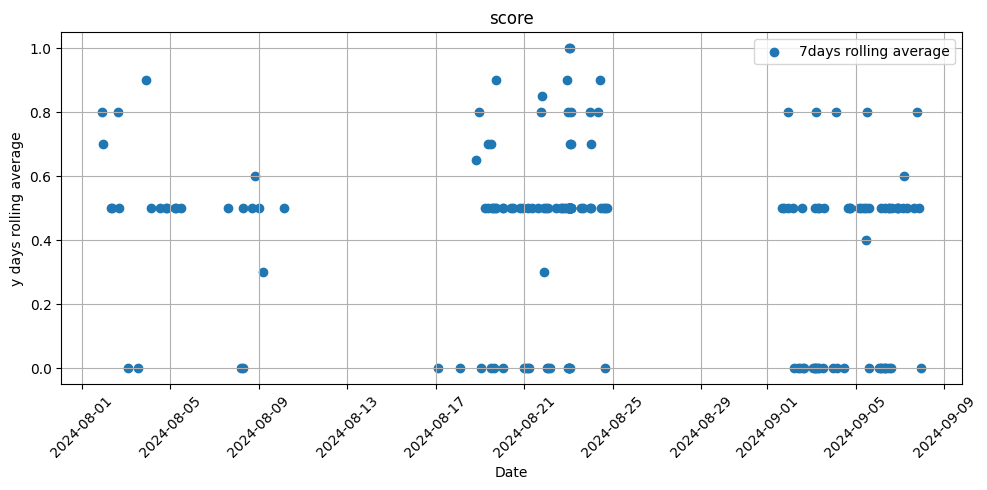

In [334]:
import pandas as pd 
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 5))
plt.scatter(df_apple_processed.index, df_apple_processed['score'], marker='o', label='7days rolling average')
plt.title('score')
plt.xlabel('Date')
plt.ylabel('y days rolling average')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

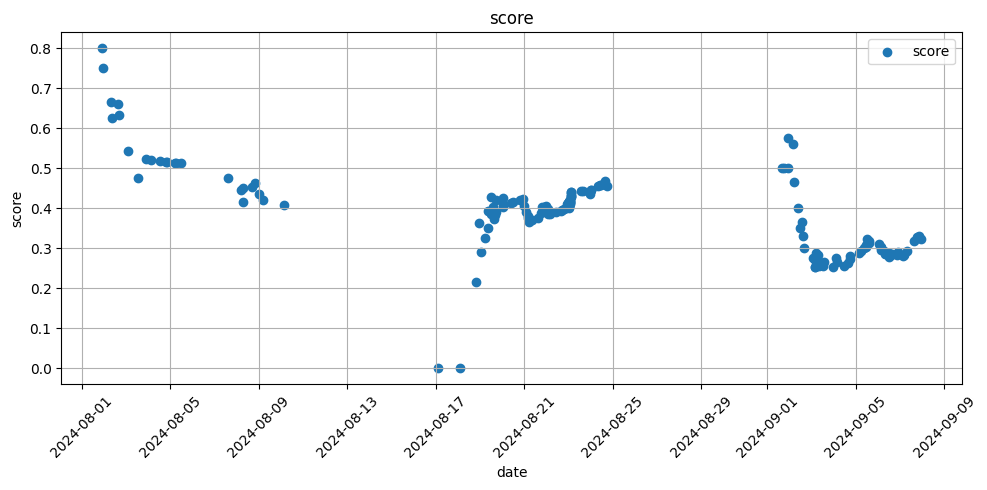

In [335]:
# 5 days rolling
df_apple_processed['5d_avg'] = df_apple_processed['score'].rolling(window='5D').mean()

# plot scatter graph
plt.figure(figsize=(10, 5))
plt.scatter(df_apple_processed.index, df_apple_processed['5d_avg'], marker='o', label='score')
plt.title('score')
plt.xlabel('date')
plt.ylabel('score')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

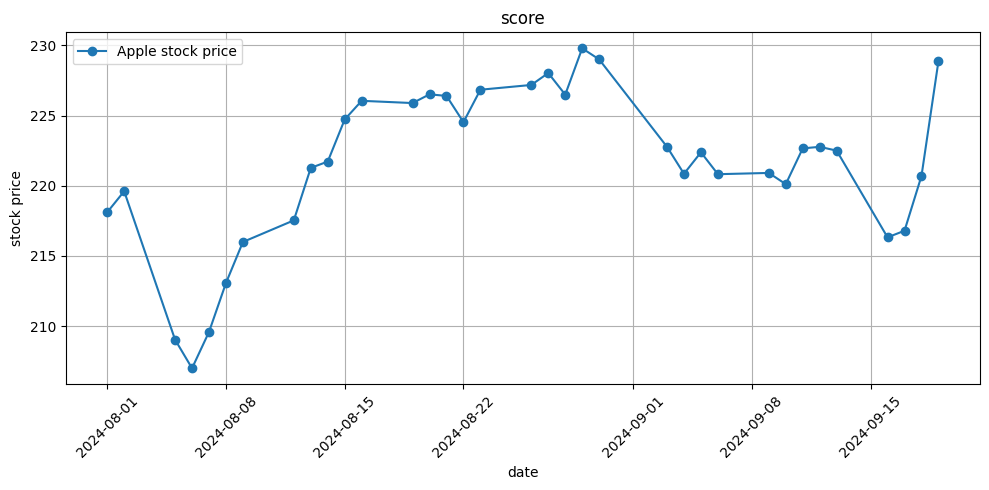

In [336]:
# stock data
import yfinance as yf 

appl = yf.Ticker('AAPL')
price_apple = appl.history(start='2024-08-01', end='2024-09-20')

# plot line graph
plt.figure(figsize=(10, 5))
plt.plot(price_apple.index, price_apple['Close'], marker='o', label='Apple stock price')
plt.title('score')
plt.xlabel('date')
plt.ylabel('stock price')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [337]:
# reset index for merging on date columns
df_apple_processed.reset_index(inplace=True)
df_apple_processed['date_adjusted'] = df_apple_processed['date'].dt.strftime('%Y-%m-%d')

price_apple.reset_index(inplace=True)

In [339]:
df_apple_processed['date_adjusted'] = pd.to_datetime(df_apple_processed['date_adjusted']).dt.tz_localize(None)
price_apple['Date'] = price_apple['Date'].dt.tz_localize(None)
df_combined_apple = pd.merge(df_apple_processed, price_apple, left_on='date_adjusted', right_on='Date')
df_combined_apple

,date,title,link,seen_date,texts,entity,ticker,score,publish_date,5d_avg,date_adjusted,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-08-01 22:00:00,Apple spending more to get Apple Intelligence ...,https://9to5mac.com/2024/08/01/tim-cook-spendi...,20240801T220000Z,Apple on Thursday announced the results of its...,Apple,,0.8,2024-08-01,0.800000,2024-08-01,2024-08-01,224.110590,224.220463,216.769097,218.107544,62501000,0.0,0.0
1,2024-08-01 22:45:00,"애플 , 4~6월 실적 … 매출 5 % 증가하며 월가 예상치 상회",https://www.edaily.co.kr/News/Read?newsId=0127...,20240801T224500Z,[이데일리 정다슬 기자] 애플의 4~6월 실적이 전년동기 대비 5% 증가하며 월가의...,애플,,0.7,2024-08-02,0.750000,2024-08-01,2024-08-01,224.110590,224.220463,216.769097,218.107544,62501000,0.0,0.0
2,2024-08-02 07:30:00,苹果向腾讯和字节跳动施压 ， 威胁拒绝更新微信 、 抖音,https://finance.ifeng.com/c/8biUqZMkbLp,20240802T073000Z,8月2日，据彭博社报道，苹果据悉就中国市场的App收费向腾讯和字节跳动施压，这一不寻常举动可...,Apple,,0.5,,0.666667,2024-08-02,2024-08-02,218.896619,225.339173,217.458296,219.605804,105568600,0.0,0.0
3,2024-08-02 09:00:00,苹果的未来 ， 还是难以 「 既要又要 」,https://www.163.com/dy/article/J8JNKSJG05198R9...,20240802T090000Z,特别声明：以上内容(如有图片或视频亦包括在内)为自媒体平台“网易号”用户上传并发布，本平台仅...,,,0.5,2024-08-02,0.625000,2024-08-02,2024-08-02,218.896619,225.339173,217.458296,219.605804,105568600,0.0,0.0
4,2024-08-02 15:00:00,Apple Reports Record Revenue Despite Sluggish ...,https://www.gizchina.com/2024/08/02/apple-repo...,20240802T150000Z,Apple just shared its financial results for th...,Apple,,0.8,2024-08-02,0.660000,2024-08-02,2024-08-02,218.896619,225.339173,217.458296,219.605804,105568600,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2024-09-06 13:45:00,国产应用 ， 为何在苹果面前直不起腰 ？- 钛媒体官方网站,https://www.tmtpost.com/7241530.html,20240906T134500Z,,,,0,0000-00-00,0.282000,2024-09-06,2024-09-06,223.949997,225.240005,219.770004,220.820007,48423000,0.0,0.0
125,2024-09-06 15:00:00,Apple Ring just teased in official Apple surve...,https://www.tomsguide.com/wellness/fitness-tra...,20240906T150000Z,Smartwatches are out and smart rings are in. O...,Apple,AAPL,0.5,2024-09-06,0.286275,2024-09-06,2024-09-06,223.949997,225.240005,219.770004,220.820007,48423000,0.0,0.0
126,2024-09-06 21:00:00,Apple Watch Series 10 leak reveals six new fea...,https://bgr.com/tech/last-minute-leak-reveals-...,20240906T210000Z,The Apple Watch Series 10 is expected to be an...,Apple,AAPL,0.5,2024-09-06,0.282000,2024-09-06,2024-09-06,223.949997,225.240005,219.770004,220.820007,48423000,0.0,0.0
127,2024-09-06 21:30:00,Apple Watch Series 10 to Get Updated ECG Senso...,https://www.iclarified.com/94789/apple-watch-s...,20240906T213000Z,New details about the features of the next gen...,Apple,AAPL,0.5,2024-09-06,0.286275,2024-09-06,2024-09-06,223.949997,225.240005,219.770004,220.820007,48423000,0.0,0.0


In [340]:
# shifted stock price
df_combined_apple['Close_shift_1'] = df_combined_apple['Close'].shift(1)
df_combined_apple['Close_shift_2'] = df_combined_apple['Close'].shift(2)
df_combined_apple['Close_shift_3'] = df_combined_apple['Close'].shift(3)
df_combined_apple['Close_shift_5'] = df_combined_apple['Close'].shift(5)
df_combined_apple['Close_shift_10'] = df_combined_apple['Close'].shift(10)
df_combined_apple['Close_shift_15'] = df_combined_apple['Close'].shift(15)
df_combined_apple['Close_shift_20'] = df_combined_apple['Close'].shift(20)
df_combined_apple['Close_shift_30'] = df_combined_apple['Close'].shift(30)

# simple correlations
corr_miscrosoft = df_combined_apple[['score', '5d_avg', 'Close', 'Close_shift_1', 'Close_shift_2', 'Close_shift_3', 'Close_shift_5', 'Close_shift_10', 'Close_shift_20', 'Close_shift_30']].corr()
corr_miscrosoft

,score,5d_avg,Close,Close_shift_1,Close_shift_2,Close_shift_3,Close_shift_5,Close_shift_10,Close_shift_20,Close_shift_30
score,1.000000,0.367283,0.056444,0.095289,0.092329,0.084586,0.031713,0.082337,-0.080322,0.046602
5d_avg,0.367283,1.000000,-0.144145,-0.096425,-0.045125,-0.001903,0.028658,0.113712,-0.191773,-0.202568
Close,0.056444,-0.144145,1.000000,0.942291,0.870418,0.798587,0.681441,0.336756,-0.129873,-0.301509
Close_shift_1,0.095289,-0.096425,0.942291,1.000000,0.942155,0.870104,0.728019,0.427878,-0.114046,-0.298275
Close_shift_2,0.092329,-0.045125,0.870418,0.942155,1.000000,0.942017,0.797575,0.509558,-0.092396,-0.292651
Close_shift_3,0.084586,-0.001903,0.798587,0.870104,0.942017,1.000000,0.869455,0.580418,-0.070357,-0.287088
Close_shift_5,0.031713,0.028658,0.681441,0.728019,0.797575,0.869455,1.000000,0.677099,0.073882,-0.289327
Close_shift_10,0.082337,0.113712,0.336756,0.427878,0.509558,0.580418,0.677099,1.000000,0.316947,-0.229795
Close_shift_20,-0.080322,-0.191773,-0.129873,-0.114046,-0.092396,-0.070357,0.073882,0.316947,1.000000,0.297824
Close_shift_30,0.046602,-0.202568,-0.301509,-0.298275,-0.292651,-0.287088,-0.289327,-0.229795,0.297824,1.000000


In [341]:
# correlation p-value
from scipy.stats import pearsonr
from tqdm.notebook import tqdm

days = [0, 1, 2, 3, 5, 10, 20, 30]
correlations = []
p_values = []

for d in tqdm(days):
    if d == 0:
        column = 'Close'
    else:
        column = f'Close_shift_{d}'
    correlation, p_value = pearsonr(df_combined_apple['5d_avg'][d:], df_combined_apple[column][d:])
    correlations.append(correlation)
    p_values.append(p_value)

df_corr_apple = pd.DataFrame({
    'shifted_day': days,
    'correlation': correlations,
    'p-value': p_values 
})

df_corr_apple.round(6)

  0%|          | 0/8 [00:00<?, ?it/s]

,shifted_day,correlation,p-value
0,0,-0.144145,0.103153
1,1,-0.096425,0.278918
2,2,-0.045125,0.614431
3,3,-0.001903,0.983128
4,5,0.028658,0.752037
5,10,0.113712,0.218191
6,20,-0.191773,0.045753
7,30,-0.202568,0.044343


## Microsoft

In [342]:
# microsoft
df_microsoft_processed = df_micosoft.dropna()

# dropout rows with no score
df_microsoft_processed = df_microsoft_processed[df_microsoft_processed['score'] != '']

# convert 'seen_date' from str to date
df_microsoft_processed['date'] = pd.to_datetime(df_microsoft_processed['seen_date'], format='%Y%m%dT%H%M%SZ')
# df_microsoft_processed['date'] = df_microsoft_processed['date'].dt.strftime('%Y-%m-%d')
df_microsoft_processed.set_index('date', inplace=True)
df_microsoft_processed.sort_index(inplace=True)

In [343]:
df_microsoft_processed

,title,link,seen_date,texts,entity,ticker,score,publish_date
date,,,,,,,,
2024-08-06 03:45:00,微软今日起把安全工作与员工绩效考核挂钩 ： 安全高于一切,https://tech.ifeng.com/c/8bnoJemos2L,20240806T034500Z,IT之家 8 月 6 日消息，在经历了多年的安全问题和越来越多的批评之后，微软将安全作为每位...,微软,,0.8,2023-08-06
2024-08-06 17:00:00,Microsoft says Delta ignored Satya Nadella off...,https://www.theverge.com/2024/8/6/24214371/mic...,20240806T170000Z,Microsoft has responded to Delta Air Lines’ cr...,Microsoft,MSFT,0.6,2024-08-06
2024-08-06 22:15:00,Microsoft to Delta lawyers : You never replied...,https://timesofindia.indiatimes.com/technology...,20240806T221500Z,Microsoft denied Delta Airlines' claims that i...,Microsoft,,0,
2024-08-06 23:00:00,"Microsoft snaps back at Delta , accuses airlin...",https://www.windowscentral.com/microsoft/micro...,20240806T230000Z,"Delta's CEO recently said Microsoft is ""probab...",Microsoft,,0.8,2024-08-06
2024-08-07 18:30:00,Microsoft says Delta ancient IT explains long ...,https://arstechnica.com/tech-policy/2024/08/mi...,20240807T183000Z,Microsoft says that Delta Air Lines' ancient I...,Microsoft,,0.7,2024-08-07
...,...,...,...,...,...,...,...,...
2024-09-20 10:30:00,Microsoft Stock : Here Why the Tech Giant Is R...,https://www.investing.com/analysis/microsoft-s...,20240920T103000Z,Microsoft hit an all-time high in July but has...,Microsoft,NASDAQ:,0.8,2023-09-20
2024-09-20 13:15:00,Microsoft wants Three Mile Island to fuel its ...,https://www.theverge.com/2024/9/20/24249770/mi...,20240920T131500Z,Microsoft just signed a deal to revive the shu...,Microsoft,MSFT,0.8,2024-09-20
2024-09-20 13:45:00,Better AI Stock : Microsoft vs . Alphabet,https://www.fool.com/investing/2024/09/20/bett...,20240920T134500Z,Both big tech players are benefiting from AI's...,Microsoft,MSFT,0.8,2024-09-20


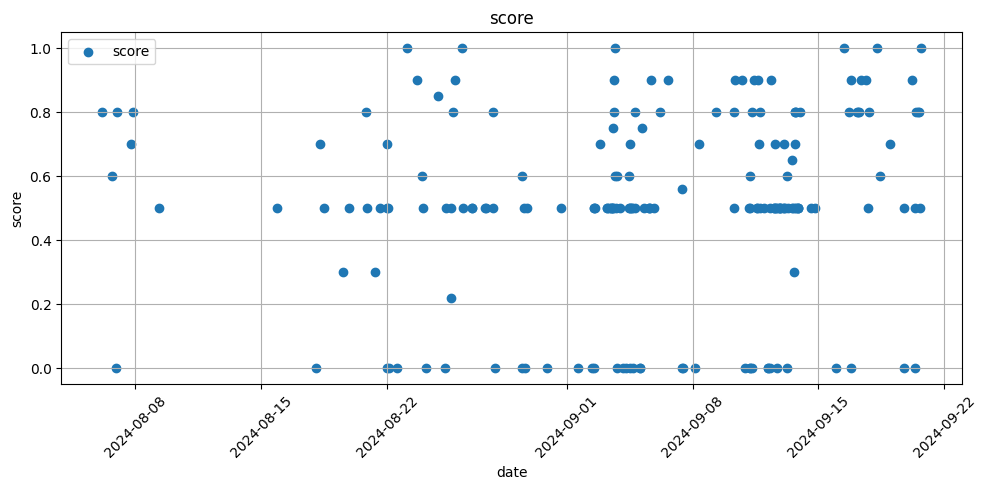

In [344]:
import pandas as pd 
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 5))
plt.scatter(df_microsoft_processed.index, df_microsoft_processed['score'], marker='o', label='score')
plt.title('score')
plt.xlabel('date')
plt.ylabel('score')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

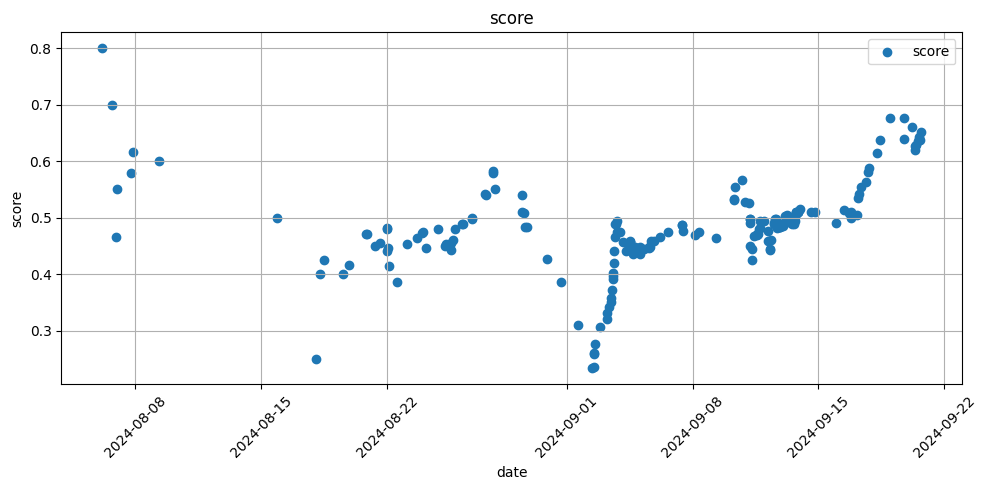

In [345]:
# 5 days rolling
df_microsoft_processed['5d_avg'] = df_microsoft_processed['score'].rolling(window='5D').mean()

# plot scatter graph
plt.figure(figsize=(10, 5))
plt.scatter(df_microsoft_processed.index, df_microsoft_processed['5d_avg'], marker='o', label='score')
plt.title('score')
plt.xlabel('date')
plt.ylabel('score')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

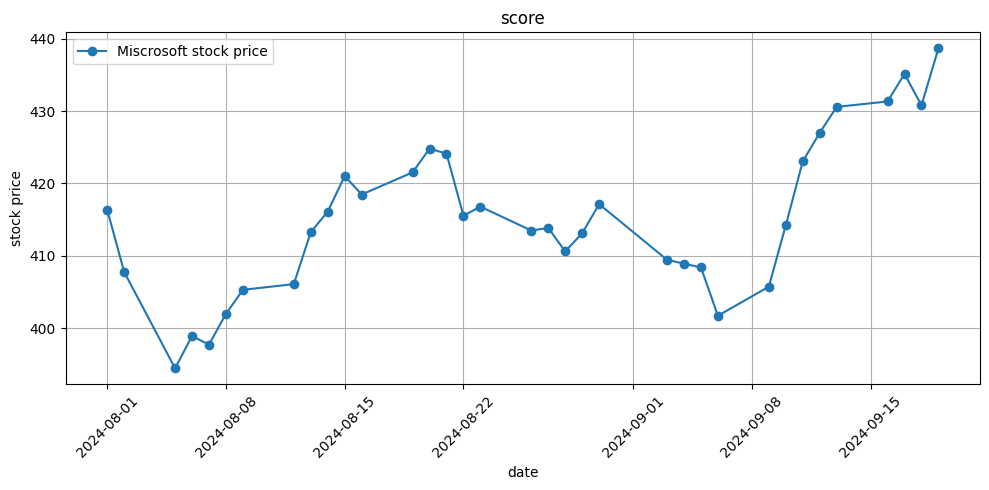

In [346]:
# stock data
import yfinance as yf 

msft = yf.Ticker('MSFT')
price_micorsoft = msft.history(start='2024-08-01', end='2024-09-20')

# plot line graph
plt.figure(figsize=(10, 5))
plt.plot(price_micorsoft.index, price_micorsoft['Close'], marker='o', label='Miscrosoft stock price')
plt.title('score')
plt.xlabel('date')
plt.ylabel('stock price')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [347]:
# reset index for merging on date columns
df_microsoft_processed.reset_index(inplace=True)
df_microsoft_processed['date_adjusted'] = df_microsoft_processed['date'].dt.strftime('%Y-%m-%d')

price_micorsoft.reset_index(inplace=True)

In [348]:
df_microsoft_processed['date_adjusted'] = pd.to_datetime(df_microsoft_processed['date_adjusted']).dt.tz_localize(None)
price_micorsoft['Date'] = price_micorsoft['Date'].dt.tz_localize(None)
df_combined_miscrosoft = pd.merge(df_microsoft_processed, price_micorsoft, left_on='date_adjusted', right_on='Date')
df_combined_miscrosoft

,date,title,link,seen_date,texts,entity,ticker,score,publish_date,5d_avg,date_adjusted,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-08-06 03:45:00,微软今日起把安全工作与员工绩效考核挂钩 ： 安全高于一切,https://tech.ifeng.com/c/8bnoJemos2L,20240806T034500Z,IT之家 8 月 6 日消息，在经历了多年的安全问题和越来越多的批评之后，微软将安全作为每位...,微软,,0.8,2023-08-06,0.800000,2024-08-06,2024-08-06,399.280335,404.940147,397.783033,398.891022,24946500,0.0,0.0
1,2024-08-06 17:00:00,Microsoft says Delta ignored Satya Nadella off...,https://www.theverge.com/2024/8/6/24214371/mic...,20240806T170000Z,Microsoft has responded to Delta Air Lines’ cr...,Microsoft,MSFT,0.6,2024-08-06,0.700000,2024-08-06,2024-08-06,399.280335,404.940147,397.783033,398.891022,24946500,0.0,0.0
2,2024-08-06 22:15:00,Microsoft to Delta lawyers : You never replied...,https://timesofindia.indiatimes.com/technology...,20240806T221500Z,Microsoft denied Delta Airlines' claims that i...,Microsoft,,0,,0.466667,2024-08-06,2024-08-06,399.280335,404.940147,397.783033,398.891022,24946500,0.0,0.0
3,2024-08-06 23:00:00,"Microsoft snaps back at Delta , accuses airlin...",https://www.windowscentral.com/microsoft/micro...,20240806T230000Z,"Delta's CEO recently said Microsoft is ""probab...",Microsoft,,0.8,2024-08-06,0.550000,2024-08-06,2024-08-06,399.280335,404.940147,397.783033,398.891022,24946500,0.0,0.0
4,2024-08-07 18:30:00,Microsoft says Delta ancient IT explains long ...,https://arstechnica.com/tech-policy/2024/08/mi...,20240807T183000Z,Microsoft says that Delta Air Lines' ancient I...,Microsoft,,0.7,2024-08-07,0.580000,2024-08-07,2024-08-07,407.904818,409.342199,396.754901,397.713165,20650900,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,2024-09-18 06:15:00,150 ميزة جديدة .. ماذا جددت مايكروسوفت على Cop...,https://www.eremnews.com/sciences-technology/o...,20240918T061500Z,عقدت شركة مايكروسوفت حدثًا مباشرًا بعنوان Micr...,Microsoft,MSFT,1.0,Unknown,0.614516,2024-09-18,2024-09-18,435.000000,436.029999,430.410004,430.809998,18898000,0.0,0.0
150,2024-09-18 10:45:00,Microsoft reveals Russian election interferenc...,https://www.moneycontrol.com/technology/micros...,20240918T104500Z,Kamala Harris\n\nMicrosoft’s latest Threat Int...,Harris-Walz campaign,,0.6,2024-09-18,0.638333,2024-09-18,2024-09-18,435.000000,436.029999,430.410004,430.809998,18898000,0.0,0.0
151,2024-09-19 00:00:00,"I loved my job at Microsoft , but I had to res...",https://finance.yahoo.com/news/resigned-dream-...,20240919T000000Z,"In Microsoft’s own words on climate change, “t...",Microsoft,MSFT,0.7,,0.676471,2024-09-19,2024-09-19,441.230011,441.500000,436.899994,438.690002,21706600,0.0,0.0
152,2024-09-19 18:15:00,Microsoft Flight Simulator 2024 Premium Editio...,https://www.gamespot.com/articles/microsoft-fl...,20240919T181500Z,Xbox Series X|S and PC players can take to the...,Microsoft,MSFT,0.5,Unknown,0.676471,2024-09-19,2024-09-19,441.230011,441.500000,436.899994,438.690002,21706600,0.0,0.0


In [349]:
correlation = df_combined_miscrosoft[['score','5d_avg', 'Open']].corr()
correlation

,score,5d_avg,Open
score,1.000000,0.232443,0.112682
5d_avg,0.232443,1.000000,0.193923
Open,0.112682,0.193923,1.000000


In [350]:
# shifted stock price
df_combined_miscrosoft['Close_shift_1'] = df_combined_miscrosoft['Close'].shift(1)
df_combined_miscrosoft['Close_shift_2'] = df_combined_miscrosoft['Close'].shift(2)
df_combined_miscrosoft['Close_shift_3'] = df_combined_miscrosoft['Close'].shift(3)
df_combined_miscrosoft['Close_shift_5'] = df_combined_miscrosoft['Close'].shift(5)
df_combined_miscrosoft['Close_shift_10'] = df_combined_miscrosoft['Close'].shift(10)
df_combined_miscrosoft['Close_shift_15'] = df_combined_miscrosoft['Close'].shift(15)
df_combined_miscrosoft['Close_shift_20'] = df_combined_miscrosoft['Close'].shift(20)
df_combined_miscrosoft['Close_shift_30'] = df_combined_miscrosoft['Close'].shift(30)

# simple correlations
corr_miscrosoft = df_combined_miscrosoft[['score', '5d_avg', 'Close', 'Close_shift_1', 'Close_shift_2', 'Close_shift_3', 'Close_shift_5', 'Close_shift_10', 'Close_shift_20', 'Close_shift_30']].corr()
corr_miscrosoft

,score,5d_avg,Close,Close_shift_1,Close_shift_2,Close_shift_3,Close_shift_5,Close_shift_10,Close_shift_20,Close_shift_30
score,1.000000,0.232443,0.057031,0.079104,0.104981,0.086967,0.074510,0.148202,0.050876,0.207955
5d_avg,0.232443,1.000000,0.233554,0.283784,0.339770,0.335913,0.375207,0.432287,0.477009,0.206686
Close,0.057031,0.233554,1.000000,0.974367,0.939564,0.907656,0.850111,0.765935,0.690234,0.527916
Close_shift_1,0.079104,0.283784,0.974367,1.000000,0.973717,0.937992,0.878554,0.762481,0.694627,0.534196
Close_shift_2,0.104981,0.339770,0.939564,0.973717,1.000000,0.973023,0.907943,0.756417,0.699773,0.543248
Close_shift_3,0.086967,0.335913,0.907656,0.937992,0.973023,1.000000,0.939613,0.761020,0.707255,0.552070
Close_shift_5,0.074510,0.375207,0.850111,0.878554,0.907943,0.939613,1.000000,0.836727,0.736078,0.583854
Close_shift_10,0.148202,0.432287,0.765935,0.762481,0.756417,0.761020,0.836727,1.000000,0.718296,0.619709
Close_shift_20,0.050876,0.477009,0.690234,0.694627,0.699773,0.707255,0.736078,0.718296,1.000000,0.658043
Close_shift_30,0.207955,0.206686,0.527916,0.534196,0.543248,0.552070,0.583854,0.619709,0.658043,1.000000


In [351]:
# correlation p-value
from scipy.stats import pearsonr
from tqdm.notebook import tqdm

days = [0, 1, 2, 3, 5, 10, 20, 30]
correlations = []
p_values = []

for d in tqdm(days):
    if d == 0:
        column = 'Close'
    else:
        column = f'Close_shift_{d}'
    correlation, p_value = pearsonr(df_combined_miscrosoft['5d_avg'][d:], df_combined_miscrosoft[column][d:])
    correlations.append(correlation)
    p_values.append(p_value)

df_corr_microsoft = pd.DataFrame({
    'shifted_day': days,
    'correlation': correlations,
    'p-value': p_values 
})

df_corr_microsoft.round(6)

  0%|          | 0/8 [00:00<?, ?it/s]

,shifted_day,correlation,p-value
0,0,0.233554,0.003555
1,1,0.283784,0.000378
2,2,0.339770,0.000018
3,3,0.335913,0.000025
4,5,0.375207,0.000002
5,10,0.432287,0.000000
6,20,0.477009,0.000000
7,30,0.206686,0.021269


## Tesla

In [352]:
# tesla
df_tesla_processed = df_tesla.dropna()

# dropout rows with no score
df_tesla_processed = df_tesla_processed[df_tesla_processed['score'] != '']

# convert 'seen_date' from str to date
df_tesla_processed['date'] = pd.to_datetime(df_tesla_processed['seen_date'], format='%Y%m%dT%H%M%SZ')
df_tesla_processed.set_index('date', inplace=True)
df_tesla_processed.sort_index(inplace=True)

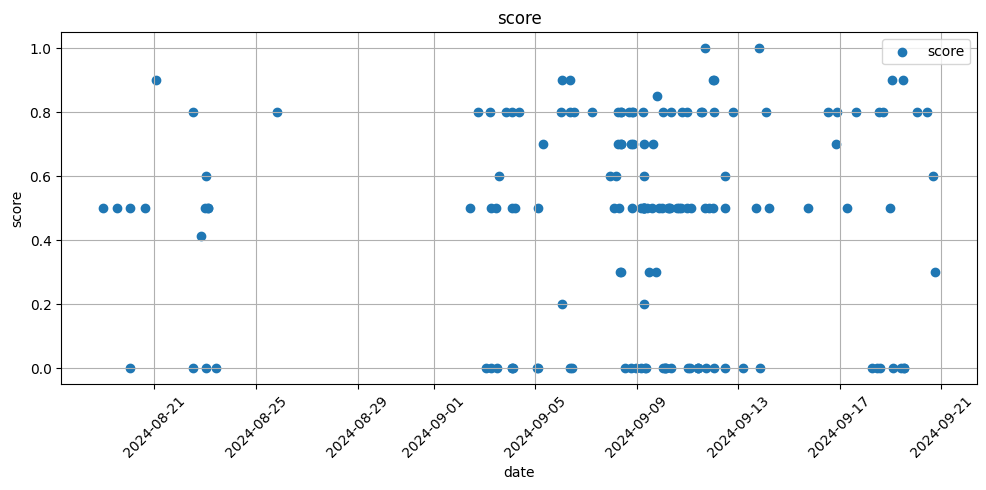

In [353]:
import pandas as pd 
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 5))
plt.scatter(df_tesla_processed.index, df_tesla_processed['score'], marker='o', label='score')
plt.title('score')
plt.xlabel('date')
plt.ylabel('score')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

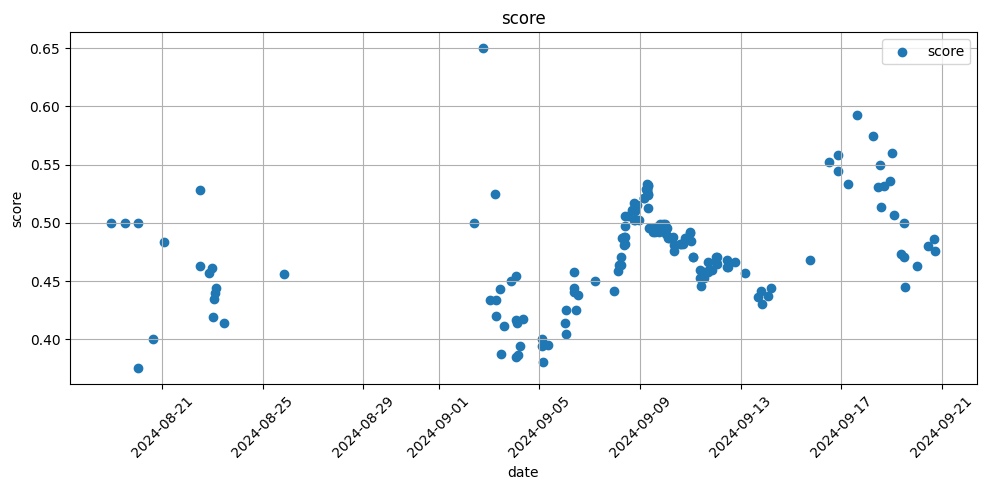

In [354]:
# 5 days rolling
df_tesla_processed['5d_avg'] = df_tesla_processed['score'].rolling(window='5D').mean()

# plot scatter graph
plt.figure(figsize=(10, 5))
plt.scatter(df_tesla_processed.index, df_tesla_processed['5d_avg'], marker='o', label='score')
plt.title('score')
plt.xlabel('date')
plt.ylabel('score')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

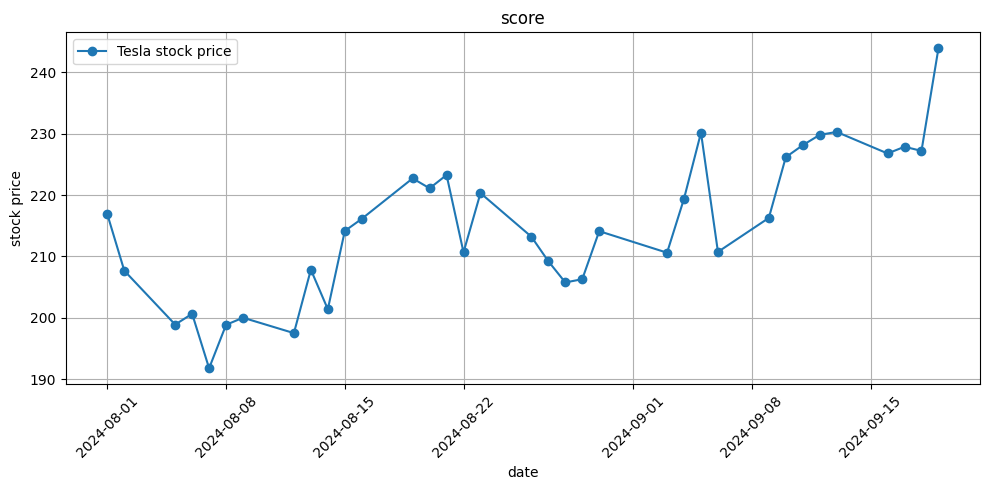

In [355]:
# stock data
import yfinance as yf 

tsla = yf.Ticker('TSLA')
price_tesla = tsla.history(start='2024-08-01', end='2024-09-20')

# plot line graph
plt.figure(figsize=(10, 5))
plt.plot(price_tesla.index, price_tesla['Close'], marker='o', label='Tesla stock price')
plt.title('score')
plt.xlabel('date')
plt.ylabel('stock price')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [356]:
# reset index for merging on date columns
df_tesla_processed.reset_index(inplace=True)
df_tesla_processed['date_adjusted'] = df_tesla_processed['date'].dt.strftime('%Y-%m-%d')

price_tesla.reset_index(inplace=True)

In [357]:
df_tesla_processed['date_adjusted'] = pd.to_datetime(df_tesla_processed['date_adjusted']).dt.tz_localize(None)
price_tesla['Date'] = price_tesla['Date'].dt.tz_localize(None)
df_combined_tesla = pd.merge(df_tesla_processed, price_tesla, left_on='date_adjusted', right_on='Date')
df_combined_tesla

,date,title,link,seen_date,texts,entity,ticker,score,publish_date,5d_avg,date_adjusted,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-08-19 12:15:00,绿牌特斯拉赛博皮卡现身天津街头 ！ 二手平台抬价到350万 ， 曾有国内车主200万购入,https://www.163.com/dy/article/J9VOS3IN0527EID...,20240819T121500Z,特别声明：以上内容(如有图片或视频亦包括在内)为自媒体平台“网易号”用户上传并发布，本平台仅...,,,0.5,2024-08-19,0.500000,2024-08-19,2024-08-19,217.070007,222.979996,214.089996,222.720001,76435200,0.0,0.0
1,2024-08-20 00:30:00,特斯拉 「 最入門 、 最便宜的Model 3 」 開賣 ！ 折合新台幣110萬 | ETt...,https://speed.ettoday.net/news/2800641,20240820T003000Z,▲墨西哥推出簡配版新特斯拉Model 3，壓低入手門檻！（圖／翻攝自特斯拉）\n\n記者徐煜...,特斯拉,,0.5,2024-08-20,0.500000,2024-08-20,2024-08-20,224.880005,228.220001,219.559998,221.100006,74001200,0.0,0.0
2,2024-08-20 00:45:00,Uber CEO ： 特斯拉低估了自动驾驶出租车商业化的复杂性,https://finance.sina.com.cn/stock/usstock/c/20...,20240820T004500Z,,,,0.0,2024-08-20,0.375000,2024-08-20,2024-08-20,224.880005,228.220001,219.559998,221.100006,74001200,0.0,0.0
3,2024-08-20 15:00:00,《 华尔街日报 》： 特斯拉在中国已经落后了,https://www.wenxuecity.com/news/2024/08/20/125...,20240820T150000Z,“特斯拉尚未能在中国推出其最先进的驾驶辅助功能，这让这家汽车制造商落后于中国电动汽车竞争对手...,特斯拉,,0.5,2024-08-20,0.400000,2024-08-20,2024-08-20,224.880005,228.220001,219.559998,221.100006,74001200,0.0,0.0
4,2024-08-21 01:30:00,特斯拉 「 全新電動超跑 」 實車被抓到 ！ 台灣訂金151萬 2 . 1秒破百加速 | E...,https://speed.ettoday.net/news/2801446,20240821T013000Z,▲等了長達7年，全新的特斯拉Roadster離上市不遠！（圖／翻攝自techeblog）\n...,特斯拉,,0.9,2024-08-21,0.483333,2024-08-21,2024-08-21,222.669998,224.660004,218.860001,223.270004,70146000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2024-09-19 02:30:00,特斯拉中国内地版车型新增全自动驾驶功能选项 目前未开放使用,https://auto.zol.com.cn/900/9008774.html,20240919T023000Z,,,,0.0,2024-09-19,0.506667,2024-09-19,2024-09-19,234.000000,244.240005,232.130005,243.919998,102694600,0.0,0.0
116,2024-09-19 09:30:00,特斯拉称绕地球八圈后电池依然能打 容量仍有85 %,https://finance.sina.com.cn/tech/roll/2024-09-...,20240919T093000Z,,,,0,2024-09-19,0.473333,2024-09-19,2024-09-19,234.000000,244.240005,232.130005,243.919998,102694600,0.0,0.0
117,2024-09-19 11:45:00,Tesla shares first render of its new Megafacto...,https://www.yahoo.com/news/tesla-shares-first-...,20240919T114500Z,Tesla shares first render of its new Megafacto...,Tesla,,0.9,,0.500000,2024-09-19,2024-09-19,234.000000,244.240005,232.130005,243.919998,102694600,0.0,0.0
118,2024-09-19 12:15:00,বার্লিনে বৈদ্যুতিক ট্রেনের যুগে টেসলার অভিষেক,https://www.bd-pratidin.com/tech-world/2024/09...,20240919T121500Z,,,,0.0,2024-09-19,0.470588,2024-09-19,2024-09-19,234.000000,244.240005,232.130005,243.919998,102694600,0.0,0.0


In [358]:
# shifted stock price
df_combined_tesla['Close_shift_1'] = df_combined_tesla['Close'].shift(1)
df_combined_tesla['Close_shift_2'] = df_combined_tesla['Close'].shift(2)
df_combined_tesla['Close_shift_3'] = df_combined_tesla['Close'].shift(3)
df_combined_tesla['Close_shift_5'] = df_combined_tesla['Close'].shift(5)
df_combined_tesla['Close_shift_10'] = df_combined_tesla['Close'].shift(10)
df_combined_tesla['Close_shift_15'] = df_combined_tesla['Close'].shift(15)
df_combined_tesla['Close_shift_20'] = df_combined_tesla['Close'].shift(20)
df_combined_tesla['Close_shift_30'] = df_combined_tesla['Close'].shift(30)

# simple correlations
corr_tesla = df_combined_tesla[['score', '5d_avg', 'Close', 'Close_shift_1', 'Close_shift_2', 'Close_shift_3', 'Close_shift_5', 'Close_shift_10', 'Close_shift_20', 'Close_shift_30']].corr()
corr_tesla

,score,5d_avg,Close,Close_shift_1,Close_shift_2,Close_shift_3,Close_shift_5,Close_shift_10,Close_shift_20,Close_shift_30
score,1.000000,0.241065,-0.072445,-0.028436,-0.036976,0.041615,0.122484,0.031554,-0.008735,-0.017605
5d_avg,0.241065,1.000000,0.139606,0.123074,0.116215,0.125361,0.158131,0.197419,0.285208,0.094527
Close,-0.072445,0.139606,1.000000,0.916287,0.832526,0.744762,0.600210,0.515661,0.605883,0.427580
Close_shift_1,-0.028436,0.123074,0.916287,1.000000,0.911293,0.822196,0.630017,0.533907,0.609365,0.399772
Close_shift_2,-0.036976,0.116215,0.832526,0.911293,1.000000,0.905561,0.709474,0.526110,0.570268,0.415963
Close_shift_3,0.041615,0.125361,0.744762,0.822196,0.905561,1.000000,0.796408,0.551241,0.527424,0.377791
Close_shift_5,0.122484,0.158131,0.600210,0.630017,0.709474,0.796408,1.000000,0.577351,0.479321,0.322105
Close_shift_10,0.031554,0.197419,0.515661,0.533907,0.526110,0.551241,0.577351,1.000000,0.486803,0.527284
Close_shift_20,-0.008735,0.285208,0.605883,0.609365,0.570268,0.527424,0.479321,0.486803,1.000000,0.415114
Close_shift_30,-0.017605,0.094527,0.427580,0.399772,0.415963,0.377791,0.322105,0.527284,0.415114,1.000000


In [359]:
# correlation p-value
from scipy.stats import pearsonr
from tqdm.notebook import tqdm

days = [0, 1, 2, 3, 5, 10, 20, 30]
correlations = []
p_values = []

for d in tqdm(days):
    if d == 0:
        column = 'Close'
    else:
        column = f'Close_shift_{d}'
    correlation, p_value = pearsonr(df_combined_tesla['5d_avg'][d:], df_combined_tesla[column][d:])
    correlations.append(correlation)
    p_values.append(p_value)

df_corr_tesla = pd.DataFrame({
    'shifted_day': days,
    'correlation': correlations,
    'p-value': p_values 
})

df_corr_tesla.round(6)

  0%|          | 0/8 [00:00<?, ?it/s]

,shifted_day,correlation,p-value
0,0,0.139606,0.128321
1,1,0.123074,0.182374
2,2,0.116215,0.210121
3,3,0.125361,0.178062
4,5,0.158131,0.091434
5,10,0.197419,0.038707
6,20,0.285208,0.004025
7,30,0.094527,0.375502
